## MNIST DIGIT CLASSIFICATION

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import CONFIG

import sys
sys.path.insert(0, "../src")
sys.path.insert(1, "../../GaussBayes/bayesTheorem/src/")
%load_ext autoreload
%autoreload 2
from KNN import KNNClassifier
from GaussNB import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [121]:
TripG = pd.read_csv(CONFIG.data / "TripGaussKNN.csv")
TripG.head()

,Unnamed: 0,0,1,2
0,0,2.769395,0.762216,0
1,1,1.519271,1.487948,0
2,2,2.407084,2.836605,0
3,3,1.276534,1.396749,0
4,4,0.380165,4.396517,0


In [36]:
TripG1 = TripG.iloc[:, 1:]
TripG1.head()

,0,1,2
0,2.769395,0.762216,0
1,1.519271,1.487948,0
2,2.407084,2.836605,0
3,1.276534,1.396749,0
4,0.380165,4.396517,0


In [65]:
X_vis = np.random.uniform(-6, 6,(int(1000*10), 2))
y_hat_vis = knn.predict(X_vis, K=17)


In [51]:
X = TripG1.iloc[:,:2].to_numpy()
y = TripG1.iloc[:,-1].to_numpy()
knn = KNNClassifier()
knn.fit(X, y)
y_hat = knn.predict(X, K=100)
accuracy(y, y_hat)


1.0

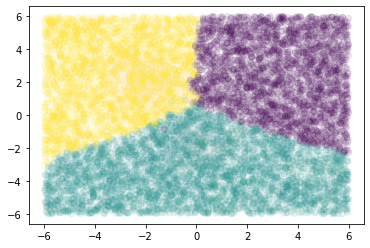

In [66]:
plt.scatter(X[:,0],X[:,1], c=y, alpha=.005)
plt.scatter(X_vis[:,0], X_vis[:,1],c=y_hat_vis, alpha=0.09)

In [68]:
import numpy as np
import pandas as pd

%load_ext autoreload
%auto_reload 2
from config import CONFIG

In [89]:
import sys
sys.path.insert(0, "../src")
from KNN import KNNClassifier, accuracy


In [69]:
data = pd.read_csv(CONFIG.data / "MNIST_train.csv")
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
len(data["labels"].unique())

10

In [81]:
data.iloc[:, 3:].max().max()

255

In [83]:
data["labels"].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: labels, dtype: int64

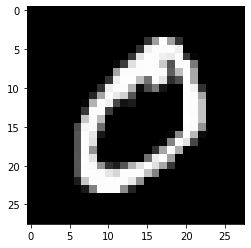

In [86]:
firstImg = data.iloc[1, 3:].to_numpy()
plt.imshow(firstImg.reshape((28, 28)), cmap="gray")

In [113]:
X = data.iloc[:, 3:].to_numpy()
y = data.iloc[:, 2].to_numpy()

In [114]:
X.shape

(60000, 784)

In [99]:
test_data = pd.read_csv(CONFIG.data / "MNIST_test.csv")
test_data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
knn = KNNClassifier()
X = X / 255
knn.fit(X, y)
y_hat = knn.predict(X, K=10).astype("int")
accuracy(y, y_hat)



KeyboardInterrupt: 

In [101]:
X_test = test_data.iloc[:, 3:].to_numpy()
y_test = test_data.iloc[:, 2].to_numpy()

In [104]:
X_test = X_test / 255

In [105]:
y_hat_test = knn.predict(X_test, K=10)
accuracy(y_test, y_hat_test)

ValueError: operands could not be broadcast together with shapes (3000,2) (784,) 

In [106]:
X_test.shape

(10000, 784)

In [107]:
knn.X.shape

(3000, 2)

In [108]:
X.shape

(3000, 2)

In [109]:
X

array([[ 0.01086037,  0.00298908],
       [ 0.00595792,  0.00583509],
       [ 0.00943954,  0.01112394],
       ...,
       [-0.00823005,  0.00817345],
       [-0.00597376,  0.0042498 ],
       [-0.01126239,  0.00134886]])